In [13]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.datasets import load_breast_cancer

font_name = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
rc('font', family=font_name)

cancer = load_breast_cancer()
cancer.keys()
cancer.data.shape 

(569, 30)

In [3]:
import numpy as np 

# 양성과 악성 데이터의 수
for n, v in zip(cancer.target_names, np.bincount(cancer.target)) :
    print({n : v})

{'malignant': 212}
{'benign': 357}


In [5]:
# 특성의 명칭
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
# 훈련 데이터와 테스트 데이터 분리
# stratify를 해주면 배분이 잘 됨.
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
print(x_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)


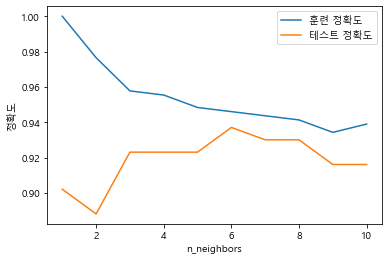

In [15]:
training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) # 분류 모델 생성
    clf.fit(x_train, y_train)
    
    training_accuracy.append(clf.score(x_train, y_train)) # 훈련 세트 정확도 저장
    test_accuracy.append(clf.score(x_test, y_test)) # 일반화 정확도 저장

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()
# 이 그래프를 통해서 이웃의 수가 6일 때 정확도가 가장 좋은 것을 확인할 수 있다.

In [26]:
from sklearn.neighbors import KNeighborsRegressor

# 영화에 대한 3개의 특성
X_train = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
# 영화에 대한 별점
y_train = [5.0, 6.8, 9.0]

# 모델 학습
model = KNeighborsRegressor(n_neighbors=3, weights='distance') # 회귀 모델 , weights='distance'하면 가까운 정도로 보여줌 안하면 평균
model.fit(X_train, y_train)

# 새로운 영화 3건에 대해 별점을 예측
X_test = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]

pre = model.predict(X_test)
pre

array([7.28143288, 7.76451922, 6.8457845 ])